In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

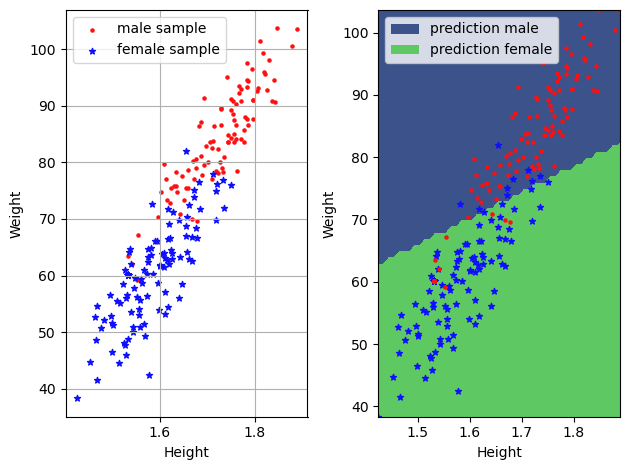

In [7]:
from least_squares import least_squares
from plots import visualization


def least_square_classification_demo(y, x):
    """Least square demo

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    
    w,l=least_squares(y,tx)

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")


least_square_classification_demo(y, x)

#### The `least_square_classification_demo` is expected to show

![1](./classification_by_least_square.png)

## Logistic Regression

Compute your cost by negative log likelihood.

In [8]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """
    return np.exp(t)/(1+np.exp(t))


test(sigmoid)

✅ Your `sigmoid` passed 2 tests.


In [22]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    n=y.shape[0]
    l=0
    for i in range (n):
        xw=np.dot(tx[i,:],w)
        l+=np.log(1+np.exp(xw)) - y[i,0]*xw

    l=l[0]/n

    return l


test(calculate_loss)

✅ Your `calculate_loss` passed 4 tests.


In [23]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    n=y.shape[0]
    grad=np.dot(tx.T,sigmoid(np.dot(tx,w))-y)
    grad=grad/n

    return grad


test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [25]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    gr=calculate_gradient(y,tx,w)
    l=calculate_loss(y,tx,w)
    w=w-gamma*gr
    
    return l,w



test(learning_by_gradient_descent)

✅ Your `learning_by_gradient_descent` passed 7 tests.


Demo!

Current iteration=0, loss=0.6931471805599465
Current iteration=100, loss=0.25727807758229904
Current iteration=200, loss=0.2354612766230436
Current iteration=300, loss=0.22402749546644224
Current iteration=400, loss=0.21743934892145103
Current iteration=500, loss=0.21337866206030554
Current iteration=600, loss=0.21074981111571225
Current iteration=700, loss=0.20898450986240566
Current iteration=800, loss=0.20776551243295807
Current iteration=900, loss=0.20690519298954663
Current iteration=1000, loss=0.20628738195411755
Current iteration=1100, loss=0.20583744941158436
Current iteration=1200, loss=0.20550598727687266
Current iteration=1300, loss=0.20525946348042898
Current iteration=1400, loss=0.20507464518877028
Current iteration=1500, loss=0.2049351533097045
Current iteration=1600, loss=0.20482926953052644
Current iteration=1700, loss=0.20474850436405448
Current iteration=1800, loss=0.2046866411426354
Current iteration=1900, loss=0.2046390853160284
Current iteration=2000, loss=0.204602

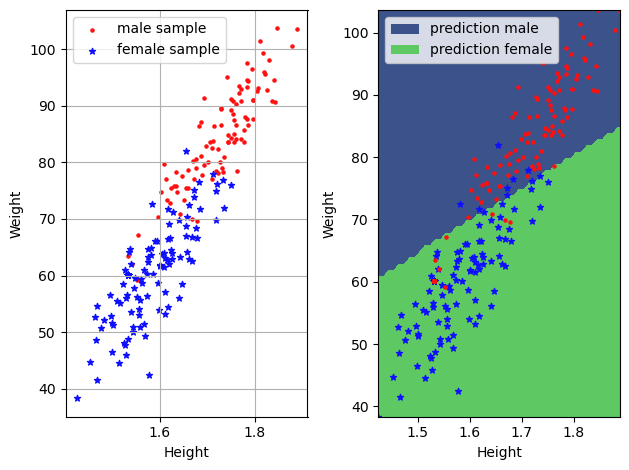

In [70]:
from helpers import de_standardize


def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print('NORM: ',np.linalg.norm(w))
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_gradient_descent_demo(y, x)

#### The `logistic_regression_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_gradient_descent.png)

Calculate your hessian below

In [48]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a hessian matrix of shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_hessian(y, tx, w)
    array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]])
    """
    n=y.shape[0]
    xw=np.dot(tx,w)
    s_values=sigmoid(xw)*(1-sigmoid(xw))
    s=np.diag(s_values[:,0])
    a=np.dot(s,tx)
    return 1/n * np.dot(tx.T,np.dot(s,tx))


test(calculate_hessian)

✅ Your `calculate_hessian` passed 4 tests.


Write a function below to return loss, gradient, and hessian.

In [49]:
def logistic_regression(y, tx, w):
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)
        hessian: shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> loss, gradient, hessian = logistic_regression(y, tx, w)
    >>> round(loss, 8)
    0.62137268
    >>> gradient, hessian
    (array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]]), array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]]))
    """
    l=calculate_loss(y,tx,w)
    gr=calculate_gradient(y,tx,w)
    he=calculate_hessian(y,tx,w)
    
    return l,gr,he


test(logistic_regression)

✅ Your `logistic_regression` passed 6 tests.


### Using Newton's method
Use Newton's method for logistic regression.

In [50]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step of Newton's method.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 0., 1., 1.]]
    >>> np.random.seed(0)
    >>> tx = np.random.rand(4, 3)
    >>> w = np.array([[0.1], [0.5], [0.5]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_newton_method(y, tx, w, gamma)
    >>> round(loss, 8)
    0.71692036
    >>> w
    array([[-1.31876014],
           [ 1.0590277 ],
           [ 0.80091466]])
    """
    loss, gr, he = logistic_regression(y,tx,w)
    
    w = np.linalg.solve(he,np.dot(he,w)-gamma*gr)
    
    return loss, w


test(learning_by_newton_method)

✅ Your `learning_by_newton_method` passed 8 tests.


demo

Current iteration=0, the loss=0.6931471805599465
Current iteration=1, the loss=0.3170577686954797
Current iteration=2, the loss=0.23652293099675334
Current iteration=3, the loss=0.2099873371124225
Current iteration=4, the loss=0.20478199318618956
Current iteration=5, the loss=0.20447559968244783
Current iteration=6, the loss=0.20447412808813542
Current iteration=7, the loss=0.20447412804945297
NORM:  7.420168332147874
loss=0.20447412804945295


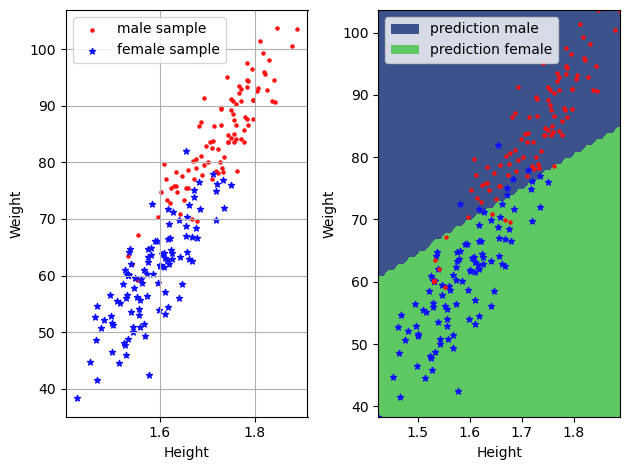

In [69]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.0
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))

        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print('NORM: ',np.linalg.norm(w))
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_newton_method",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_newton_method_demo(y, x)

#### The `logistic_regression_newton_method_demo` is expected to show

![1](../template/classification_by_logistic_regression_newton_method.png)

### Using penalized logistic regression
Fill in the function below.

In [64]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss and gradient.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        lambda_: scalar

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    >>> round(loss, 8)
    0.63537268
    >>> gradient
    array([[-0.08370763],
           [ 0.2467104 ],
           [ 0.57712843]])
    """

    loss=calculate_loss(y,tx,w) + lambda_*np.sum(np.square(w))
    gr=calculate_gradient(y,tx,w)+ 2*lambda_*w

    return loss,gr


test(penalized_logistic_regression)

✅ Your `penalized_logistic_regression` passed 7 tests.


In [65]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar
        lambda_: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> gamma = 0.1
    >>> loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
    >>> round(loss, 8)
    0.63537268
    >>> w
    array([[0.10837076],
           [0.17532896],
           [0.24228716]])
    """
    
    loss,gr=penalized_logistic_regression(y,tx,w,lambda_)
    w=w-gamma*gr
    return loss, w


test(learning_by_penalized_gradient)

✅ Your `learning_by_penalized_gradient` passed 9 tests.


Current iteration=0, loss=0.6931471805599465
Current iteration=100, loss=0.26193624237659585
Current iteration=200, loss=0.24339056454546948
Current iteration=300, loss=0.2347966500053552
Current iteration=400, loss=0.2304637688379347
Current iteration=500, loss=0.22815007131276202
Current iteration=600, loss=0.22686405903902493
Current iteration=700, loss=0.2261285953973078
Current iteration=800, loss=0.22569919502743407
Current iteration=900, loss=0.2254446276917862
Current iteration=1000, loss=0.2252919699556659
Current iteration=1100, loss=0.2251996264447815
Current iteration=1200, loss=0.22514339519906107
Current iteration=1300, loss=0.22510897849624537
Current iteration=1400, loss=0.22508783000330004
Current iteration=1500, loss=0.22507479456852167
Current iteration=1600, loss=0.22506674053328965
Current iteration=1700, loss=0.22506175494701786
Current iteration=1800, loss=0.2250586642438501
Current iteration=1900, loss=0.22505674601979864
NORM:  5.633869286110441
loss=0.20918543

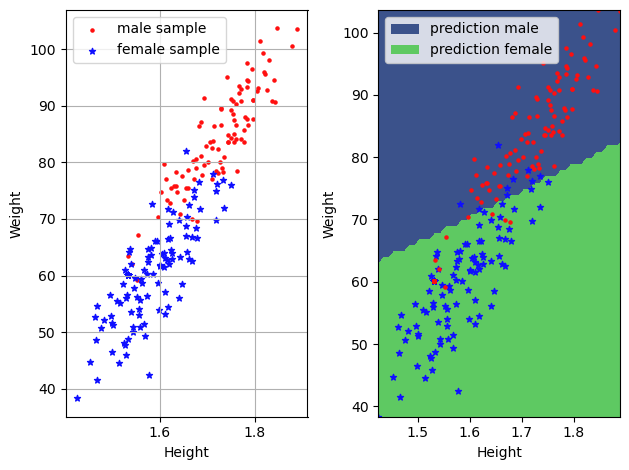

In [68]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.5
    lambda_ = 0.0005
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print('NORM: ',np.linalg.norm(w))
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_penalized_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))


logistic_regression_penalized_gradient_descent_demo(y, x)

#### The `logistic_regression_penalized_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_penalized_gradient_descent.png)